# Latent Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [3]:
!pip install pandas==1.3.5
!pip install spacy==3.2.0
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install newspaper3k

!pip install plotly

!pip install bokeh

  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.3.5 which is incompatible.


  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.4.12 requires pydantic<2.0,>=1.9, but you have pydantic 1.8.2 which is incompatible.
chromadb 0.4.12 requires typer>=0.9.0, but you have typer 0.4.2 which is incompatible.


     ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
     --------------------------------------- 0.0/13.9 MB 991.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/13.9 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.4/13.9 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.7/13.9 MB 3.9 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/13.9 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/13.9 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.6/13.9 MB 10.8 MB/s eta 0:00:01
     ---------------- ----------------------- 5.8/13.9 MB 15.4 MB/s eta 0:00:01
     ----------------------- ---------------- 8.0/13.9 MB 19.0 MB/s eta 0:00:01
     ---------------------------- ---------- 10.2/13.9 MB 21.8 MB/s eta 0:00:01
     ---------------------------------- ---- 12.4/13.9 MB 43.7 MB/s eta 0:00:01
     --------------------------------------  13.9/13.

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [50]:
from newspaper import Article
from random import shuffle
import re
import matplotlib.pyplot as plt 
from collections import Counter

import numpy as np
import json
import requests
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.colors as mcolors
import sklearn
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [51]:
#import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import requests
#from newspaper import Article
#import numpy as np

In [52]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

IMPORTANT: If you want to try re-runing after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [53]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [54]:
csvFile = "urls_gabriel_generated.csv"
wordCountFilter = 150
#social_starts_with = ["https://www.youtube.com", "https://youtu.be", "https://www.facebook.com", 
#                     "https://twitter.com", "https://gettr.com/"]


In [55]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# This is the pipeline. All code is called and ran through here.

In [56]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0):
        print(str(count))

    url = x

    # Send the URL to get scraped
    page_text = scrapeData(x)
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
        
#print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
#print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# For each analysis we run we need to then convert that dictionary with the following method
df = dictionaryToDataFrame(sentimentDic)
df
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
word count  39
repeated phrases 1
https://www.bbc.com/news/world-us-canada-55805698


,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.foxnews.com/politics/hunter-bidens...,0.04,Neutral,0.24,"new, best, more, unpaid, legal, first, main","approximately, least, firm, previously, limite...","exclusive: the $250,000 wire hunter biden rece..."
1,https://www.foxnews.com/politics/doj-ordered-h...,0.06,Neutral Positive,0.35,"most, new, appropriate, real, normal, light, w...","least, other, foreign, artificially, limited, ...",the u.s. department of justice ordered fbi and...
2,https://www.foxnews.com/politics/hunter-biden-...,-0.04,Neutral Negative,0.37,"new, extraordinary, many, direct, generally, l...","illegally, past, not, complaint, infamous, har...",hunter biden on tuesday filed a lawsuit agains...
3,https://apnews.com/article/hunter-biden-impeac...,0.02,Neutral Negative,0.37,"right, action, new, own, more, many, legal, hi...","long, thin, previous, hard, expected, unlikely...",washington (ap) — house republicans launched a...
4,https://www.nation.com.pk/21-Jun-2023/hunter-b...,-0.04,Neutral Negative,0.44,"love, social, first, important, detailed, not","least, other, failure, due, foreign, guilty, c...","washigton-hunter biden, the son of president j..."
5,https://www.nation.com.pk/25-Jul-2021/white-ho...,0.10,Neutral Positive,0.41,"winning, professional, appropriate, new, econo...",half,washington - the white house assured saturday ...
6,https://www.nation.com.pk/24-Dec-2019/hunter-b...,-0.11,Negative,0.40,"new, nearly, more","average, firm, shady, behind, allegedly, limit...",hunter biden is the subject of multiple crimin...
7,https://www.cnn.com/2023/09/27/politics/house-...,-0.01,Neutral Negative,0.35,"apparent, real, new, appropriate, general, lig...","addicted, not, firm, roughly, other, single, c...",washington cnn —\ndocuments released wednesday...
8,https://www.bbc.com/news/world-us-canada-55805698,0.00,PARERROR: WebBlockerError,0.00,,,PARERROR: WebBlockerError
9,https://abcnews.go.com/Politics/comer-issue-su...,0.01,Neutral Negative,0.40,"new, more, directly, first, far, top","late, previously, extreme, missing, mean, other",house oversight committee chairman james comer...


# Dropping failed webscraping rows

In [57]:
df = drop_failed_webscraping_rows(df)
df

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.foxnews.com/politics/hunter-bidens...,0.04,Neutral,0.24,"new, best, more, unpaid, legal, first, main","approximately, least, firm, previously, limite...","exclusive: the $250,000 wire hunter biden rece..."
1,https://www.foxnews.com/politics/doj-ordered-h...,0.06,Neutral Positive,0.35,"most, new, appropriate, real, normal, light, w...","least, other, foreign, artificially, limited, ...",the u.s. department of justice ordered fbi and...
2,https://www.foxnews.com/politics/hunter-biden-...,-0.04,Neutral Negative,0.37,"new, extraordinary, many, direct, generally, l...","illegally, past, not, complaint, infamous, har...",hunter biden on tuesday filed a lawsuit agains...
3,https://apnews.com/article/hunter-biden-impeac...,0.02,Neutral Negative,0.37,"right, action, new, own, more, many, legal, hi...","long, thin, previous, hard, expected, unlikely...",washington (ap) — house republicans launched a...
4,https://www.nation.com.pk/21-Jun-2023/hunter-b...,-0.04,Neutral Negative,0.44,"love, social, first, important, detailed, not","least, other, failure, due, foreign, guilty, c...","washigton-hunter biden, the son of president j..."
5,https://www.nation.com.pk/25-Jul-2021/white-ho...,0.10,Neutral Positive,0.41,"winning, professional, appropriate, new, econo...",half,washington - the white house assured saturday ...
6,https://www.nation.com.pk/24-Dec-2019/hunter-b...,-0.11,Negative,0.40,"new, nearly, more","average, firm, shady, behind, allegedly, limit...",hunter biden is the subject of multiple crimin...
7,https://www.cnn.com/2023/09/27/politics/house-...,-0.01,Neutral Negative,0.35,"apparent, real, new, appropriate, general, lig...","addicted, not, firm, roughly, other, single, c...",washington cnn —\ndocuments released wednesday...
9,https://abcnews.go.com/Politics/comer-issue-su...,0.01,Neutral Negative,0.40,"new, more, directly, first, far, top","late, previously, extreme, missing, mean, other",house oversight committee chairman james comer...


# Create Topic Model w/ Highest Coherence

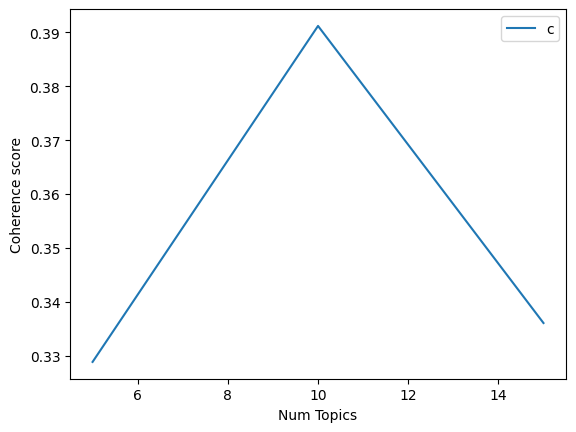

In [58]:
#This will generate multiple topic models with various topic count, then return the model with highest coherence
#it will also display a quick visual of coherence values, to understand what topic count is best and why it was chosen
LDA_model, corpus = create_lda_model(df, 20, 5, 5)
LDA_model

In [59]:
#here we create a list of topic words and their associated weights
LDA_model_topics = LDA_model.print_topics() #LDA_model[corpus]

LDA_model_topics.sort()
print(len(LDA_model_topics))
LDA_model_topics


10


[(0,
  '0.002*"hunter" + 0.001*"document" + 0.001*"say" + 0.001*"president" + 0.001*"business" + 0.001*"family" + 0.001*"include" + 0.001*"political" + 0.001*"criminal" + 0.001*"impeachment"'),
 (1,
  '0.001*"hunter" + 0.001*"wire" + 0.001*"say" + 0.001*"address" + 0.001*"son" + 0.001*"receive" + 0.001*"partner" + 0.001*"bank" + 0.001*"business" + 0.001*"president"'),
 (2,
  '0.030*"hunter" + 0.024*"say" + 0.024*"bank" + 0.021*"address" + 0.021*"record" + 0.018*"comer" + 0.015*"wire" + 0.012*"family" + 0.012*"house" + 0.012*"receive"'),
 (3,
  '0.022*"scheme" + 0.018*"account" + 0.014*"document" + 0.014*"include" + 0.014*"court" + 0.014*"criminal" + 0.014*"claim" + 0.014*"money" + 0.014*"case" + 0.014*"filing"'),
 (4,
  '0.001*"hunter" + 0.001*"say" + 0.001*"wire" + 0.001*"receive" + 0.001*"address" + 0.001*"partner" + 0.001*"impeachment" + 0.001*"business" + 0.001*"president" + 0.001*"document"'),
 (5,
  '0.018*"hunter" + 0.018*"laptop" + 0.018*"president" + 0.015*"file" + 0.013*"driv

In [60]:
topic_dict = topic_level_sentiment(LDA_model)
topic_dict

{'Topic_0': ['hunter',
  'document',
  'say',
  'president',
  'business',
  'family',
  'include',
  'political',
  'criminal',
  'impeachment'],
 'Topic_1': ['hunter',
  'wire',
  'say',
  'address',
  'son',
  'receive',
  'partner',
  'bank',
  'business',
  'president'],
 'Topic_2': ['hunter',
  'say',
  'bank',
  'address',
  'record',
  'comer',
  'wire',
  'family',
  'house',
  'receive'],
 'Topic_3': ['scheme',
  'account',
  'document',
  'include',
  'court',
  'criminal',
  'claim',
  'money',
  'case',
  'filing'],
 'Topic_4': ['hunter',
  'say',
  'wire',
  'receive',
  'address',
  'partner',
  'impeachment',
  'business',
  'president',
  'document'],
 'Topic_5': ['hunter',
  'laptop',
  'president',
  'file',
  'drive',
  'email',
  'datum',
  'device',
  'son',
  'business'],
 'Topic_6': ['wire',
  'hunter',
  'partner',
  'address',
  'receive',
  'beneficiary',
  'investment',
  'chinese',
  'list',
  'say'],
 'Topic_7': ['hunter',
  'say',
  'president',
  'son',


# DATA VISUALIZATION

In [61]:
#making a new dataframe 
df_main_topic = add_main_topic_dataframe(df, LDA_model, corpus)

df_main_topic

#LDA_model.get_document_topics(corpus)
#df['Topics'] = LDA_model.get_document_topics(corpus)
#df.shape

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text,Topics,Main Topic,Main Topic Score
0,https://www.foxnews.com/politics/hunter-bidens...,0.04,Neutral,0.24,"new, best, more, unpaid, legal, first, main","approximately, least, firm, previously, limite...","exclusive: the $250,000 wire hunter biden rece...","[(6, 0.92484844), (9, 0.072929114)]",6,0.924848
1,https://www.foxnews.com/politics/doj-ordered-h...,0.06,Neutral Positive,0.35,"most, new, appropriate, real, normal, light, w...","least, other, foreign, artificially, limited, ...",the u.s. department of justice ordered fbi and...,"[(9, 0.9979907)]",9,0.997991
2,https://www.foxnews.com/politics/hunter-biden-...,-0.04,Neutral Negative,0.37,"new, extraordinary, many, direct, generally, l...","illegally, past, not, complaint, infamous, har...",hunter biden on tuesday filed a lawsuit agains...,"[(5, 0.99751353)]",5,0.997514
3,https://apnews.com/article/hunter-biden-impeac...,0.02,Neutral Negative,0.37,"right, action, new, own, more, many, legal, hi...","long, thin, previous, hard, expected, unlikely...",washington (ap) — house republicans launched a...,"[(9, 0.99831426)]",9,0.998314
4,https://www.nation.com.pk/21-Jun-2023/hunter-b...,-0.04,Neutral Negative,0.44,"love, social, first, important, detailed, not","least, other, failure, due, foreign, guilty, c...","washigton-hunter biden, the son of president j...","[(9, 0.9944088)]",9,0.994409
5,https://www.nation.com.pk/25-Jul-2021/white-ho...,0.10,Neutral Positive,0.41,"winning, professional, appropriate, new, econo...",half,washington - the white house assured saturday ...,"[(8, 0.99411726)]",8,0.994117
6,https://www.nation.com.pk/24-Dec-2019/hunter-b...,-0.11,Negative,0.40,"new, nearly, more","average, firm, shady, behind, allegedly, limit...",hunter biden is the subject of multiple crimin...,"[(3, 0.99318147)]",3,0.993181
7,https://www.cnn.com/2023/09/27/politics/house-...,-0.01,Neutral Negative,0.35,"apparent, real, new, appropriate, general, lig...","addicted, not, firm, roughly, other, single, c...",washington cnn —\ndocuments released wednesday...,"[(9, 0.99817413)]",9,0.998174
9,https://abcnews.go.com/Politics/comer-issue-su...,0.01,Neutral Negative,0.40,"new, more, directly, first, far, top","late, previously, extreme, missing, mean, other",house oversight committee chairman james comer...,"[(2, 0.99621814)]",2,0.996218


# Visualize all articles on their main topic

In [62]:
df_main_topic['Shortened Address'] = df_main_topic['URL'].str.slice(0,35) #shorten the urls to make them easier to read in hover text

df_main_topic = df_main_topic.sort_values('Main Topic') #sort df by main topic so it is in order in the graph.

fig_w_topics = px.scatter(df_main_topic, x="Main Topic", y="Sentiment Score",
                         size="Main Topic Score", custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic Score'],
                         title="Articles Sorted By Main Topic")#creating a scatter plot with x, y, and color from our df. 
#The custom_data is what we will add to our hover text

fig_w_topics.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic Score :%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data

fig_w_topics.update_xaxes(type="category")#turn into categorical not continuous data for the x-axis

fig_w_topics.show()

# Generating Cluster Graph of Topics

In [63]:
num_topics = len(LDA_model_topics)

#print(num_topics)

#Get Topic Weights
topic_weights = []
for i in df["Topics"]:
    per_doc_list = [None] * num_topics
    #print(len(per_doc_list))
    for x in i:
        #print(x)
        per_doc_list[x[0]] = x[1]
    topic_weights.append(per_doc_list)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).to_numpy()

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

#print(arr)

# tSNE Model Creation
tsne_model = TSNE(n_components=2, verbose=1, 
                  random_state=0, angle=.99, 
                  init='pca', perplexity = (arr.shape[0] - 1) / 3)
tsne_lda = tsne_model.fit_transform(arr)

#Color palette for the clusters
mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])


#creating the cluster graph in plotly
fig_cluster = px.scatter(df, x = tsne_lda[:,0],y = tsne_lda[:,1],
                        custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic'],
                        color = mycolors[topic_num],
                        size = "Main Topic Score",
                        title = "Topic Clustering Graph")

fig_cluster.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic:%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data



fig_cluster.show()

[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.001s...
[t-SNE] Computed neighbors for 9 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 0.003408
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.348827
[t-SNE] KL divergence after 850 iterations: 0.173666
